Shape: (41188, 21)

🎯 SVM Classifier Results:
Accuracy: 91.15 %

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95     10965
           1       0.69      0.38      0.49      1392

    accuracy                           0.91     12357
   macro avg       0.81      0.68      0.72     12357
weighted avg       0.90      0.91      0.90     12357



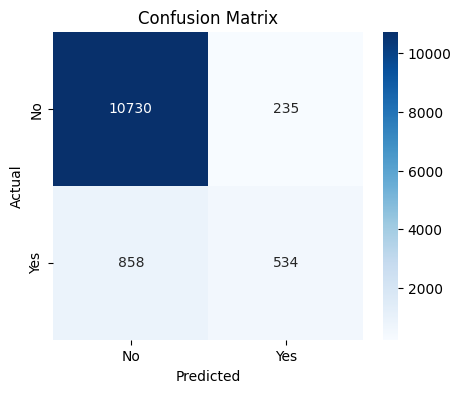

In [ ]:


import pandas as pd
import zipfile, io, requests
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip"
resp = requests.get(url)
zf = zipfile.ZipFile(io.BytesIO(resp.content))

data = pd.read_csv(zf.open("bank-additional/bank-additional-full.csv"), sep=';')


print("Shape:", data.shape)

le = LabelEncoder()
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = le.fit_transform(data[col])

X = data.drop("y", axis=1)
y = data["y"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("\n SVM Classifier Results:")
print("Accuracy:", round(accuracy * 100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No","Yes"], yticklabels=["No","Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

